In [1]:
#download data

from  sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist


/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

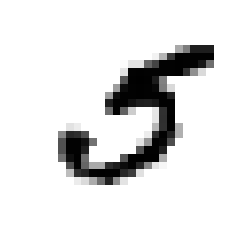

In [8]:
# show pic

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()

In [9]:
y[36000]

5.0

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [16]:
## 尝试分类器，首先选择就是SGD

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
#分类器猜测结果5
sgd_clf.predict([some_digit])

array([5.])

In [20]:
sgd_clf.predict([X[18000]])

array([2.])

In [21]:
y[18000]

2.0

In [25]:
## 考核性能
from  sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([0.87686127, 0.87126326, 0.84735319])

说明准确率通常无法成为分类器的首要性能指标。
更好的方法是采用混淆矩阵。

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
##返回每个折叠的预测
y_train_pred


/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


/home/mj/anaconda3/envs/ten/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([7., 7., 1., ..., 9., 0., 2.])

In [32]:
# 使用混淆矩阵
## 混淆矩阵行表示实际类别，列表示预测类别
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[5379,    1,   10,   20,   24,   19,   29,   22,   43,    7],
       [   3, 5964,   29,   76,   14,   36,   15,   19,  115,   25],
       [  89,   71, 4503,  222,  107,   34,  112,  117,  311,   24],
       [  46,   29,  102, 4874,   22,  202,   24,   56,  270,   82],
       [  24,   14,   23,    7, 5029,   12,   40,   17,   91,  239],
       [  99,   27,   20,  254,  121, 3956,   88,   37,  351,   74],
       [  71,   14,   30,   15,   62,   97, 5056,   12,  101,   11],
       [  25,   23,   66,   41,  121,   11,    1, 5116,   27,  386],
       [  53,   95,   48,  259,  179,  388,   45,   54, 4219,   94],
       [  42,   23,   18,  110,  622,   47,    2,  300,   93, 4353]])

In [43]:
## 精度和召回率

from sklearn.metrics import precision_score, recall_score

y_pred = sgd_clf.predict(X_test)
precision_score(y_test,y_pred,average=None)


array([0.89354396, 0.96362434, 0.62195122, 0.92904841, 0.81853532,
       0.85055351, 0.96313017, 0.78174603, 0.70411985, 0.96136012])

In [45]:
y_pred.shape

(14000,)

In [52]:
recall_score(y_train,y_train_pred,average=None)

array([0.96849118, 0.94726811, 0.80554562, 0.8540389 , 0.91502911,
       0.78695047, 0.92448345, 0.87949115, 0.7764078 , 0.77593583])

In [56]:
## F1是精度和找回的调和平均

from sklearn.metrics import f1_score

f1_score(y_test, y_pred,average=None)


array([0.92762923, 0.94212738, 0.75084938, 0.84574468, 0.87983281,
       0.77805907, 0.93567251, 0.85123457, 0.68965517, 0.6235589 ])